In [2]:
%matplotlib inline
import logging
from pprint import pprint
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import boston_housing
import keras.metrics as metrics
import math

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

from minos.experiment.experiment import ExperimentSettings
from minos.experiment.ga import run_ga_search_experiment
from minos.experiment.training import Training, EpochStoppingCondition
from minos.model.model import Objective, Optimizer, Metric
from minos.model.parameter import int_param, float_param

from minos.train.utils import SimpleBatchIterator, CpuEnvironment
from minos.train.utils import GpuEnvironment
from minos.utils import load_best_model
import numpy as np

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


def base_model():
    model = Sequential()
    model.add(Dense(14, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

clf = KerasRegressor(build_fn=base_model, epochs=10, batch_size=1, verbose=2)

history = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

Using TensorFlow backend.


Epoch 1/10
1s - loss: 372.6300
Epoch 2/10
0s - loss: 45.3445
Epoch 3/10
0s - loss: 30.7973
Epoch 4/10
0s - loss: 26.3606
Epoch 5/10
0s - loss: 24.1410
Epoch 6/10
0s - loss: 22.7277
Epoch 7/10
0s - loss: 21.3727
Epoch 8/10
0s - loss: 20.4712
Epoch 9/10
0s - loss: 19.4353
Epoch 10/10
0s - loss: 18.1484


In [3]:
history.history

{'loss': [372.63004006430884,
  45.344544188112557,
  30.797309598043555,
  26.360577156983005,
  24.141048160788348,
  22.727716763264471,
  21.372735369117194,
  20.471193297667384,
  19.435319767954411,
  18.148401924143293]}

dict_keys(['loss'])


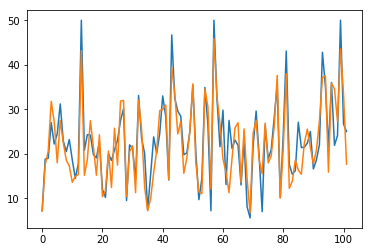

In [4]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(y_test)
plt.plot(predictions)

In [5]:
seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

clf = base_model()

history = clf.fit(X_train, y_train,verbose=2,batch_size=1)

predictions = clf.predict(X_test)

Epoch 1/10
1s - loss: 372.6300
Epoch 2/10
0s - loss: 45.3445
Epoch 3/10
0s - loss: 30.7973
Epoch 4/10
0s - loss: 26.3606
Epoch 5/10
0s - loss: 24.1410
Epoch 6/10
0s - loss: 22.7277
Epoch 7/10
0s - loss: 21.3727
Epoch 8/10
0s - loss: 20.4712
Epoch 9/10
0s - loss: 19.4353
Epoch 10/10
0s - loss: 18.1484


In [20]:
history.history

{'loss': [372.63004006430884,
  45.344544188112557,
  30.797309598043555,
  26.360577156983005,
  24.141048160788348,
  22.727716763264471,
  21.372735369117194,
  20.471193297667384,
  19.435319767954411,
  18.148401924143293]}

In [23]:
## FINAL VERSION ##


def base_model():
    model = Sequential()
    model.add(Dense(14, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

model = base_model()

history = model.fit(X_train, y_train,verbose=2,batch_size=1,validation_data=(X_test,y_test))

predictions = clf.predict(X_test)

Train on 404 samples, validate on 102 samples
Epoch 1/10
1s - loss: 372.6300 - val_loss: 75.1110
Epoch 2/10
0s - loss: 45.3445 - val_loss: 36.6664
Epoch 3/10
0s - loss: 30.7973 - val_loss: 27.9404
Epoch 4/10
0s - loss: 26.3606 - val_loss: 24.6864
Epoch 5/10
0s - loss: 24.1410 - val_loss: 24.3003
Epoch 6/10
0s - loss: 22.7277 - val_loss: 22.7387
Epoch 7/10
0s - loss: 21.3727 - val_loss: 22.8955
Epoch 8/10
0s - loss: 20.4712 - val_loss: 21.2698
Epoch 9/10
0s - loss: 19.4353 - val_loss: 20.2910
Epoch 10/10
0s - loss: 18.1484 - val_loss: 20.5057


dict_keys(['val_loss', 'loss'])


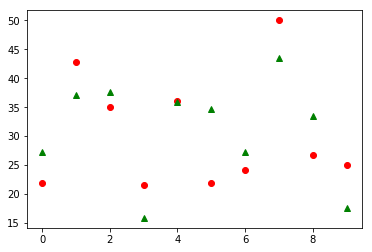

In [29]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(y_test[-10:],'ro')
plt.plot(predictions[-10:],'g^')

In [6]:
## MINOS TESTS!!! ## 


## FINAL VERSION ##


def base_model():
    model = Sequential()
    model.add(Dense(14, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


seed = 7
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

model = base_model()

history = model.fit(X_train, y_train,verbose=2,batch_size=1,validation_data=(X_test,y_test))

predictions = clf.predict(X_test)

Train on 404 samples, validate on 102 samples
Epoch 1/10
1s - loss: 372.6300 - val_loss: 75.1110
Epoch 2/10
0s - loss: 45.3445 - val_loss: 36.6664
Epoch 3/10
0s - loss: 30.7973 - val_loss: 27.9404
Epoch 4/10
0s - loss: 26.3606 - val_loss: 24.6864
Epoch 5/10
0s - loss: 24.1410 - val_loss: 24.3003
Epoch 6/10
0s - loss: 22.7277 - val_loss: 22.7387
Epoch 7/10
0s - loss: 21.3727 - val_loss: 22.8955
Epoch 8/10
0s - loss: 20.4712 - val_loss: 21.2698
Epoch 9/10
0s - loss: 19.4353 - val_loss: 20.2910
Epoch 10/10
0s - loss: 18.1484 - val_loss: 20.5057
